##### Import the required library and load the data

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../Data/MachineLearningRating_v3.txt', sep='|', low_memory=False)

##### 1. Data Preparation:

Handling Missing Data

In [2]:
# Check for missing values again
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [3]:
# Drop columns with a high percentage of missing values (e.g., more than 50%)
threshold = 0.5 * len(df)
columns_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=columns_to_drop)
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: Index(['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted',
       'CrossBorder', 'NumberOfVehiclesInFleet'],
      dtype='object')


In [4]:
# Impute numerical columns with the median value
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [5]:
# Verify there are no missing values remaining
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(f"There are still missing values:\n{missing_values[missing_values > 0]}")
else:
    print("All missing values have been handled.")

All missing values have been handled.


Feature Engineering

In [6]:
# Check data types
print(df[['CapitalOutstanding', 'SumInsured']].dtypes)

# Convert columns to numeric
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
df['SumInsured'] = pd.to_numeric(df['SumInsured'], errors='coerce')

# Handle missing values (choose one of the options below)

# Fill NaN values with defaults
df['CapitalOutstanding'].fillna(0, inplace=True)
df['SumInsured'].fillna(1, inplace=True)  # Use 1 to avoid division by zero

# Drop rows with NaN in the relevant columns
# df.dropna(subset=['CapitalOutstanding', 'SumInsured'], inplace=True)

# Perform the division
df['CapitalToInsuredRatio'] = df['CapitalOutstanding'] / df['SumInsured']

# Check the result
print(df[['CapitalOutstanding', 'SumInsured', 'CapitalToInsuredRatio']].head())

CapitalOutstanding     object
SumInsured            float64
dtype: object
   CapitalOutstanding  SumInsured  CapitalToInsuredRatio
0            119300.0        0.01             11930000.0
1            119300.0        0.01             11930000.0
2            119300.0        0.01             11930000.0
3            119300.0   119300.00                    1.0
4            119300.0   119300.00                    1.0


/tmp/ipykernel_36285/1079584357.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CapitalOutstanding'].fillna(0, inplace=True)
/tmp/ipykernel_36285/1079584357.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Encoding Categorical Data

In [7]:
# Perform One-Hot Encoding on categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['TotalPremium', 'TotalClaims'])  # Features
y = df_encoded['TotalPremium']  # You can also target TotalClaims

# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Modeling Techniques

Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()
# Use only the first 1000 rows for testing
X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

lr_model.fit(X_train_subset, y_train_subset)

# Fit the model
lr_model.fit(X_train_subset, y_train_subset)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 26532.711698698557, R2: 0.03825797702785472


Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_subset, y_train_subset)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 14417.760465386713, R2: 0.4773935557672766


XGBoost

In [ ]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train_subset, y_train_subset)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}')

##### Feature Importance Analysis

Random Forest Feature Importance

/tmp/ipykernel_26902/544119134.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


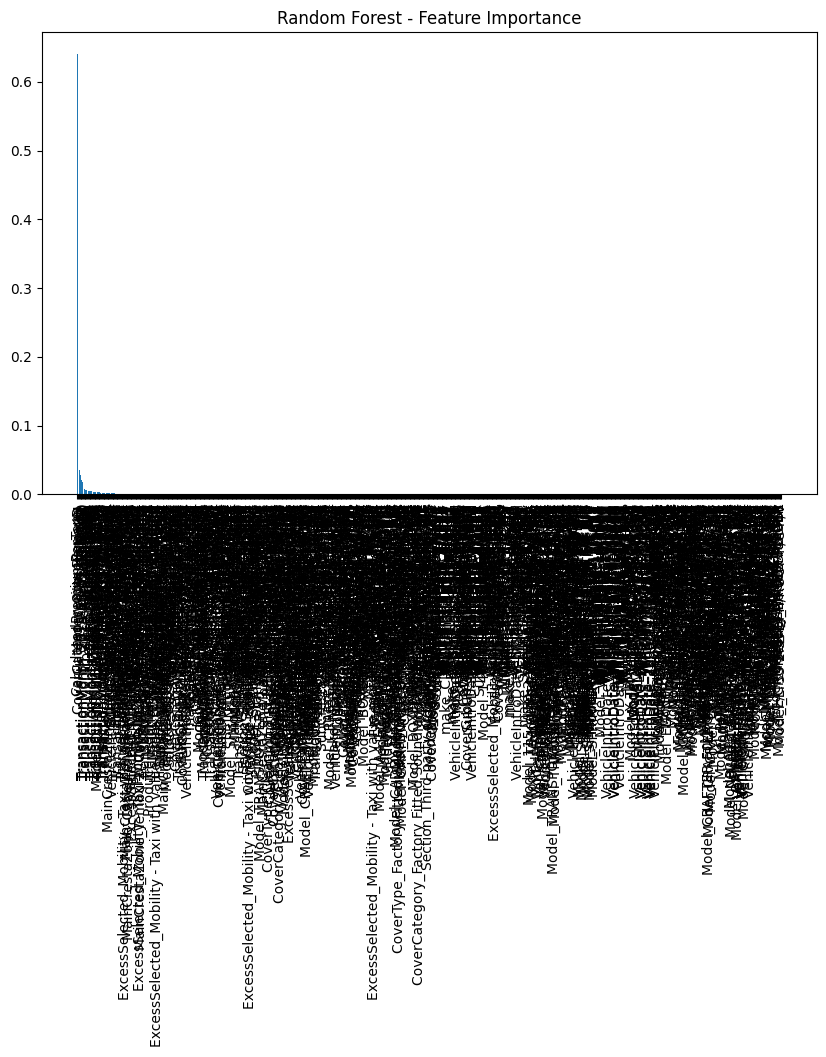

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importance")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

XGBoost Feature Importance

In [ ]:
xgb.plot_importance(xgb_model)
plt.show()

##### Model Interpretability Using SHAP

In [11]:
import shap

# SHAP values for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values_rf, X_test)